# 데이터 표현과 특성 공학

지금까지는 우리는 데이터가 2차원 실수형 배열로 각 열이 데이터 포인트를 설명하는 **연속형 특성**이라고 가정하였다. 하지만 많은 애플리케이션에서 이렇게 데이터가 수집되지는 않는다. 일반적인 특성의 전형적인 형태는 **범주형 특성**이다. 또는 **이산형 특성**이라고도 하는 이런 특성은 보통 숫자 값이 아니다. 범주형 특성과 연속적인 특성 사이의 차이는 분류와 회귀의 차이와 비슷하지만, 출력이 아닌 입력에 대한 것이란 점이 다르다. 

하지만 데이터가 어떤 형태의 특성으로 구성되어 있는가보다 데이터를 어떻게 표현하는가가 머신러닝 모델의 성능에 주는 영향이 더 크다. 2장과 3장에서 데이터의 스케일이 중요하다는 것을 보았다. 다른 말로 하면 데이터의 스케일을 조정하지 않으면, 측정치가 센티미터냐 인치냐에 따라 차이가 생긴다. 또 2장에서 본 대로 특성의 상호작용이나 일반적인 다항식을 추가 특성으로 넣는 것이 도움될 수 있다.

특정 애플리케이션에 가장 적합한 데이터 표현을 찾는 것을 **특성 공학**(feature engineering)이라 하며, 데이터 과학자와 머신러닝 기술자가 실제 문제를 풀기 위해 당면하는 주요 작업 중 하나이다. 올바른 데이터 표현은 지도 학습 모델에서 적절한 매개변수를 선택하는 것보다 성능에 더 큰 영향을 미친다.

이번 장에서는 먼저 범주형 특성의 보편적이고 중요한 사례를 살펴보고, 특정 모델에 잘 맞도록 특성을 변환하는 예를 보자.

In [2]:
import sys
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import IPython
import sklearn
import mglearn
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
#한글 폰트사용
from matplotlib import font_manager, rc
font_name =font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

from sklearn.model_selection import train_test_split as tts

# 4.1 범주형 변수

예제에 사용할 데이터는 1994년 인구 조사 데이터베이스에서 추출한 미국 성인의 소득 데이터셋이다. 이 adult 데이터셋을 사용해 어떤 근로자의 수입이 50,000달러를 초과하는지, 그 이하일지를 예측하려고 한다. 데이터셋에는 근로자 나이-age, 고용형태-workclass(자영업:self-emp-not-inc, 사업체 근로자:private, 공공 근로자:state-gov), 교육 수준-education, 성별-gender, 주당 근로시간-hours-per-week, 직업-occupation 등의 특성이 있다.

이 작업은 소득이 <=50K 와 >50K 라는 두 클래스를 가진 분류 문제로 볼 수 있다. 정확한 소득을 예측할 수도 있지만, 그러면 회귀 문제가 된다. 그러나 이는 훻씬 어렵기도 하고 5만 달러 기준만으로도 좋은 문제이다.

이 데이터셋에 있는 age와 hours-per-week는 다뤄보았던 연속형 특성이다. 그런데 workclass, education, gender, occupation은 범주형 특성이다. 이런 특성들은 어떤 범위가 아닌 고정된 목록 중 하나를 값으로 가지며, 정량적이 아니고 정성적인 속성이다.

## 4.1.1 원-핫-인코팅(가변수)

범주형 변수를 표현하는 데 가장 널리 쓰이는 방법은 **원-핫-인코딩**이다. 이를 원-아웃-오브-엔 인코딩 혹은 가변수라고도 한다. 가변수는 범주형 변수를 0 또는 1 값을 가진 하나 이상의 새로운 특성으로 바꾼 것이다. 0과 1로 표현된 변수는 선형 이진 분류 공식에 적용할 수 있어서, 다음과 같이 개수에 상관없이 범주마다 하나의 특성으로 표현한다.

pandas나 scikit-learn을 이용하여 범주형 변수를 가변수화 할 수 있다. 

In [3]:
# 이 파일은 열 이름을 나타내는 헤더가 없으므로 header=None으로 지정하고
# "names" 매개변수로 열 이름을 제공한다.
data = pd.read_csv('adult.data',
                   header=None, index_col=False, 
                   names=['age','workclass','fnlwgt','education','education-num','marital-status','occupation',
                         'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 
                          'native-country', 'income'])

data = data[['age','workclass','education','gender','hours-per-week','occupation','income']]

display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


### 범주형 데이터 문자열 확인하기

이처럼 데이터셋을 읽고 나면, 먼저 열에 어떤 의미 있는 범주형 데이터가 있는지 확인해보는 것이 좋다. 사용자로부터 입력받은 데이터를 다룰 때는 정해진 범주 밖의 값이 있을 수 있고 철자나 대소문자가 틀려서 데이터를 전처리해야 할 수 있다. 예를 들면 사람에 따라 남성을 "male" 또는 "man"이라고 할 수 있으므로 두 입력값을 모두 같은 범주로 인식해야한다. 열의 내용을 확인하는 좋은 방법은 pandas에서 Series에 있는 value_counts 메서드를 사용하여 유일한 값이 각각 몇 번 나타나는지 출력해보자.

In [4]:
print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


이 데이터셋의 gender는 정확히 두 가지 값, Male과 Female을 가지고 있어서 가변수화 코딩으로 나타내기 좋은 형태이다. 실제 애플리케이션에서는 모든 열을 살펴보고 그 값들을 확인해야한다. 여기서는 넘어감.

pandas에서는 get_dummies 함수를 사용해 데이터를 매우 쉽게 인코딩할 수 있다. get_dummies 함수는 객체 타입(믄자열 같은)이나 범주형을 가진 열을 자동으로 변환해준다.

In [5]:
print("원본 특성:\n", list(data.columns), '\n')
data_dum = pd.get_dummies(data)
print("get_dummies 후의 특성:\n", list(data_dum.columns))

원본 특성:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

get_dummies 후의 특성:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ 

연속형 특성인 age와  hours-per-week는 그대로지만 범주형 특성은 값마다 새로운 특성으로 확장되었다.

In [6]:
display(data_dum.head())

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


data_dum 의 values 속성을 이용해 DataFrame을 NumPy 배열로 바꿀 수 있으며, 이를 이용해 머신러닝 모델을 학습시킨다. 모델을 학습시키기 전에 이 데이터로부터 타깃값을 분리해야한다. 출력값이나 출력값으로부터 유도된 변수를 특성 표현에 포함하는 것은 지도 학습 모델을 만들 때 특히 저지르기 쉬운 실수이다. 

여기서는 특성을 포함한 열, 즉 age부터 occupation_Transport-moving 까지 모든 열을 추출한다. 이 범위에는 타깃을 뺀 모든 특성이 포함된다.

In [7]:
features = data_dum.loc[:, 'age':'occupation_ Transport-moving']
# NumPy 배열 추출
X = features.values
y = data_dum['income_ >50K'].values
print("X.shape: {}  y.shape: {}".format(X.shape, y.shape))

X.shape: (32561, 44)  y.shape: (32561,)


In [8]:
from sklearn.linear_model import LogisticRegression as logreg
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X,y, random_state=0)
log = logreg()
log.fit(X_train, y_train)
print("테스트 점수: {:.2f}".format(log.score(X_test, y_test)))

C:\Users\NT500R\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


테스트 점수: 0.81


## 4.1.2 숫자로 표현된 범주형 특성

adult 데이터셋에서는 범주형 변수가 문자열로 인코딩되어 있다. 철자 오류가 날 수 있지만, 다른 한편으로는 변수가 범주형이라는 것을 확실하게 알려준다. 하지만 저장 공간을 절약하거나 데이터 취합 방식에 따라 범주형 변수가 숫자로 인코딩된 경우가 많다. 

pandas의 get_dummies 함수는 숫자 특성은 모두 연속형이라고 생각해서 가변수를 만들지 않는다. 예를 들기 위해 각각 문자열과 숫자로 표현된 두 개의 범주형 특성을 가진 DataFrame 객체를 만들어보자.

In [9]:
# 숫자 특성과 범주형 문자열 특성을 가진 데이터프레임을 만든다.
demo_df = pd.DataFrame({'숫자 특성':[0,1,2,1], '범주형 특성':['양말','여우','양말','상자']})
display(demo_df)

,숫자 특성,범주형 특성
0,0,양말
1,1,여우
2,2,양말
3,1,상자


In [10]:
display(pd.get_dummies(demo_df))

,숫자 특성,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,0,0,1,0
1,1,0,0,1
2,2,0,1,0
3,1,1,0,0


'숫자 특성'도 가변수로 만들고 싶다면 columns 매개변수에 인코딩하고 싶은 열을 명시해야 한다. 그러면 두 특성을 모두 범주형으로 간주한다.

In [11]:
demo_df['숫자 특성'] = demo_df['숫자 특성'].astype(str)
display(pd.get_dummies(demo_df, columns=['숫자 특성', '범주형 특성']))

,숫자 특성_0,숫자 특성_1,숫자 특성_2,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,1,0,0,0,1,0
1,0,1,0,0,0,1
2,0,0,1,0,1,0
3,0,1,0,1,0,0


# 4.2 OneHotEncoder와 ColumnTransformer : 범주형 변수 다루기

이전에 언급한 것처럼 scikit-learn은 원-핫-인코딩을 수행할 수 있다. OneHotEncoder는 모든 열에 인코딩을 수행한다.

In [12]:
from sklearn.preprocessing import OneHotEncoder
# sparse=False로 설정하면 OneHotEncoder가 희소 행렬이 아니라 넘파이 배열을 반환한다.
ohe = OneHotEncoder(sparse=False)
print(ohe.fit_transform(demo_df))

[[1. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0.]]


문자열 특성과 정수 특성이 모두 변환되었다. 하지만 DataFrame이 아니기 때문에 열 이름이 없다. 변환된 특성에 핻ㅇ하는 원본 범주형 변수 이름을 얻으려면 get_feature_names 메서드를 사용한다.

In [13]:
print(ohe.get_feature_names())

['x0_0' 'x0_1' 'x0_2' 'x1_상자' 'x1_양말' 'x1_여우']


대부분의 애플리케이션에서 일부 특성은 범주형이고 일부는 연속형이다. OneHotEncoder는 모든 특성을 범주형이라고 가정하기 때문에 바로 적용할 수는 없다. ColumnTransformer 클래스가 필요한 이유가 여기에 있다. 이 클래스는 입력 데이터에 있는 열마다 다른 변환을 적용할 수 있다. 연속형 특성과 범주형 특성은 매우 다른 종류의 전처리 과정이 필요하기 때문에 이 클래스가 매우 유용하다.

In [14]:
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


이 데이터셋에 선형 모델을 적용하여 소득을 예측하려면 범주형 변수에 원-핫-인코딩을 적용하는 것 외에 연속형 변수인 age와 hours-per-week의 스케일도 조정해야 한다. 여기에 ColumnTransformer가 필요하다. 각 열의 변환은 이름, 변환기 객체, 이 변환이 적용될 열을 지정한다. 열은 열 이름이나 정수 인덱스, 불리언 마스크로 선택할 수 있다. 해당 열에 변환이 적용된 후 변환 결과가 합쳐진다. 

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer(
    [("scaling", StandardScaler(), ['age', 'hours-per-week']),
     ("onehot", OneHotEncoder(sparse=False),
     ['workclass','education','gender','occupation'])])

다른 scikit-learn 변환기와 동일하게 ColumnTransformer 객체의 fit, transform 메서드를 사용할 수 있다. 이전처럼 선형 모델을 만들어보자. 이번에는 연속형 변수의 스케일을 조정해보자. train_test_split 함수에 넘파이 배열이 아닌 특성을 포함하고 있는 DataFrame을 전달할 수 있다. ColumnTransformer에 필요하므로 열 이름은 보존하자.

In [16]:
from sklearn.linear_model import LogisticRegression as LR
# income을 제외한 모든 열을 추출한다.
data_features = data.drop("income",axis=1)
# 데이터프레임과 income을 분할한다.
X_train, X_test, y_train, y_test = tts(data_features, data.income, random_state=0)

ct.fit(X_train)
X_train_trans = ct.transform(X_train)
print(X_train_trans.shape)

(24420, 44)


In [17]:
lg = LR()
lg.fit(X_train_trans, y_train)

X_test_trans = ct.transform(X_test)
print("테스트 점수: {:.2f}".format(lg.score(X_test_trans, y_test)))

C:\Users\NT500R\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


테스트 점수: 0.81


이 경우에 데이터의 스케일이 영향을 미치지 못했다.

# 4.3 make_column_transformer로 간편하게 ColumnTransformer 만들기

앞서 설명한 대로 ColumnTransformer를 만들면 조금 번거로울 때가 있다. 각 단계 이름을 일일이 지정할 필요가 없는 경우가 많다. 클래스 이름을 기반으로 자동으로 각 단계에 이름을 붙여주는 편리한 함수(make_column_transformer)가 있다.

In [18]:
from sklearn.compose import make_column_transformer as mct
ct = mct((['age','hours-per-week'],StandardScaler()),
        (['workclass','education','gender','occupation'], OneHotEncoder(sparse=False)))

C:\Users\NT500R\Anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:778: DeprecationWarning: `make_column_transformer` now expects (transformer, columns) as input tuples instead of (columns, transformer). This has been introduced in v0.20.1. `make_column_transformer` will stop accepting the deprecated (columns, transformer) order in v0.22.
  warnings.warn(message, DeprecationWarning)


ColumnTransformer의 한 가지 단점은 0.20 버전에서 아직 변환된 출력 열에 대응하는 입력 열을 찾지 못한다는 것이다.

# 4.4 구간 분할, 이산화 그리고 선형 모델, 트리 모델

데이터를 가장 잘 표현하는 방법은 데이터가 가진 의미뿐 아니라 어떤 모델을 사용하는지에 따라 다르다. 아주 폭넓게 사용하는 두 알고리즘인 선형 모델과 트리 기반 모델은 특성의 표현 방식으로 인해 미치는 영향이 매우 다르다. 2장에서 사용한 wave 데이터셋을 다시 사용해서 진행한다. 이 데이터는 입력 특성이 하나 뿐이다. 이 데이터셋을 이용해 선형 회귀 모델과 결정 트리 회귀를 비교해보자.

C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


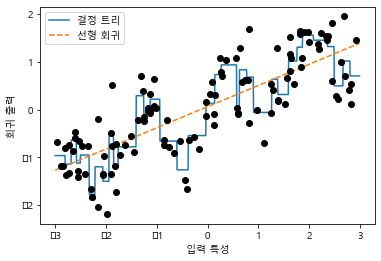

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=120)
line = np.linspace(-3,3,1000,endpoint=False).reshape(-1,1)

reg = DecisionTreeRegressor(min_samples_leaf=3).fit(X,y)
plt.plot(line, reg.predict(line), label='결정 트리')

reg = LinearRegression().fit(X,y)
plt.plot(line, reg.predict(line), '--', label='선형 회귀')

plt.plot(X[:,0],y,'o',c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc='best')

선형 모델은 선형 관계로만 모델링하므로 특성이 하나일 땐 직선으로 나타난다. 결정 트리는 이 데이터로 훨씬 복잡한 모델을 만들 수 이싿. 그러나 이는 데이터의 표현 형태에 따라 굉장히 달라진다. 연속형 데이터에 아주 강력한 선형 모델을 만드는 방법 하나는 한 특성을 여러 특성으로 나누는 **구간 분할**(binding)이다(이산화 하고도 한다).

이 특성의 입력값 범위가 나뉘어 여러 구간으로, 예를 들면 10개로 되어 있다고 생각해보자.그럼 각 데이터 포인트가 어떤 구간에 속하는지로 나타낼 수 있다. 구간의 경계를 정의하는 데는 여러 방법이 있다. 예를 들어 균일한 너비로 (즉 구간의 경계 간의 거리가 동일하게) 하거나 데이터의 분위를 사용할 수 있다(즉, 데이터가 많은 구간은 좁아진다).

In [20]:
from sklearn.preprocessing import KBinsDiscretizer
kb = KBinsDiscretizer(n_bins=10, strategy='uniform')
kb.fit(X)
print("bin edges: \n", kb.bin_edges_)

bin edges: 
 [array([-2.9668673 , -2.37804841, -1.78922951, -1.20041062, -0.61159173,
       -0.02277284,  0.56604605,  1.15486494,  1.74368384,  2.33250273,
        2.92132162])]


첫 번째 구간은 특성의 값이 -2.967(데이터에서 가장 작은 값)부터 -2.378까지 모든 데이터 포인트를 담는다. 이런 식으로 계속 된다. KBinsDiscretizer는 한 번에 여러 개의 특성에 적용할 수 있다. bin_edges_는 특성별로 경곗값이 저장되어 있다. 이 경우에는 길이가 1인 배열이 출력된다. 

trainsform 메서드를 사용하면 각 데이터 포인트를 해당되는 구간으로 인코딩할 수 있다. 기본적으로 KBinsDiscretizer는 구간에 원-핫-인코딩을 적용한다. 구간마다 하나의 새로운 특성이 생기므로 희소 행렬을 만든다. 10개의 구간을 지정했기 때문에 변환된 데이터는 10차원이다.

In [21]:
X_binned = kb.transform(X)
X_binned

<120x10 sparse matrix of type '<class 'numpy.float64'>'
	with 120 stored elements in Compressed Sparse Row format>

희소 행렬을 밀집 배열로 변환하여 원본 데이터 포인트와 인코딩 결과를 비교해보자.

In [22]:
print(X[:10])
X_binned.toarray()[:10]

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]]


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

첫 번째 데이터 포인트 -0.753이 네 번째 구간에 들어갔다. 두 번째 데이터 포인트 2.704는 열 번째 구간에 포함되었다. 이런식으로 계속된다.

여기에서 wave 데이터셋에 있는 연속형 특성을 각 데이터 포인트가 어느 구간에 속했는지 원-핫-인코딩한 범주형 특성으로 변환하였다. encode='ordinal'로 설정하면 원-핫-인코딩된 구간의 인덱스를 바로 계산할 수 있지만 유용하지는 않다.

In [23]:
kb = KBinsDiscretizer(n_bins=10, strategy='uniform', encode='onehot-dense')
kb.fit(X)
X_binned = kb.transform(X)

Text(0.5, 0, '입력 특성')

C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


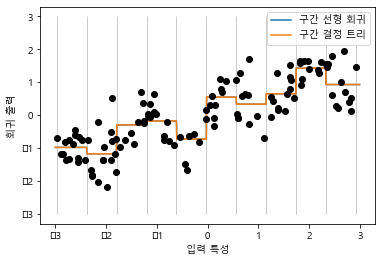

In [24]:
line_binned = kb.transform(line)

reg = LinearRegression().fit(X_binned,y)
plt.plot(line, reg.predict(line_binned), label='구간 선형 회귀')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='구간 결정 트리')
plt.plot(X[:,0], y, 'o', c='k')
plt.vlines(kb.bin_edges_[0], -3,3,linewidth=1, alpha=.2)
plt.legend(loc='best')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")

선형 호귀 모델과 결정 트리가 같은 예측을 만들어내서 파선과 실전이 완전히 겹쳐졌다. 구간별로 이 두 모델이 예측한 것은 상숫값이다. 각 구간 안에서는 특성의 값이 상수이므로, 어떤 모델이든 그 구간의 포인트에 대해서는 같은 값을 예측할 것이다. 구간으로 나눈 특성을 사용하기 전과 비교해보면, 각 구간에서 다른 값을 가지고 있으므로 선형 모델이 훨씬 유연해진 것을 알 수 있다. 반면에 결정 트리는 덜 유연해졌다. 트리 모델은 데이터를 자유롭게 나눠 학습할 수 있으므로 특성의 값을 구간으로 나누는 것이 아무런 득이 되지 않는다. 다르게 생각하면 결정 트리는 데이터셋에서 예측을 위한 가장 좋은 구간을 학습한다고 볼 수 있다. 거기다가 구간 나누기는 특성마다 따로 해야 하지만, 결정 트리는 한 번에 여러 특성을 살필 수 있다. 하지만 선형 모델은 이런 변환으로부터 큰 이득을 얻었다.

일부 특성과 출력이 비선형 관계이지만, 용량이 매우 크고 고차원 데이터셋이라 선형 모델을 사용해야 한다면 구간 분할이 모델 성능을 높이는 데 아주 좋은 방법이 될 수 있다.

# 4.5 상호작용과 다항식

특별히 특성을 풍부하게 나타내는 또 하나의 방법은 원본 데이터에 **상호작용**과 **다항식**을 추가하는 것이다. 이런 종류의 특성 공학은 통계적 모델링에서 자주 사용하지만 일반적인 머신러닝 애플리케이션에도 많이 적용한다. 

첫 번째 예제로 위의 구간 회귀와 구간 트리모델의 그림을 다시 보자. 선형 모델은 wave 데이터셋의 각 구간에 대해 상숫값을 학습했다. 그런데 선형 모델은 이런 절편 외에도 기울기도 학습할 수 있다. 선형 모델에 기울기를 추가하는 방법은 구간으로 분할된 데이터에 원래 특성을 다시 추가하는 것이다. 이렇게 하면 11차원 데이터셋이 만들어진다.

In [25]:
X_combined = np.hstack([X,X_binned])
print(X_combined.shape)

(120, 11)


C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


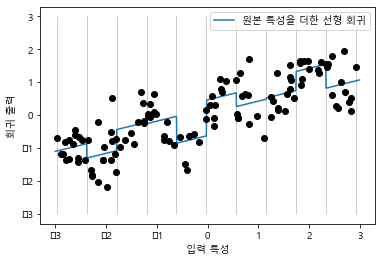

In [26]:
reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='원본 특성을 더한 선형 회귀')

plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc='best')
plt.ylabel('회귀 출력')
plt.xlabel('입력 특성')
plt.plot(X[:,0],y,'o',c='k')

이 예에서 이 모델은 각 구간의 절편과 기울기를 학습했다. 학습된 기울기는 양수이고 모든 구간에 걸쳐 동일하다. 즉 x 축 특성이 하나이므로 기울기도 하나이다. 기울기가 모든 구간에서 같으니 별로 좋아 보이지 않는다. 오히려 각 구간에서 다른 기울기를 가지는게 좋을 것 같다. 이런 효과를 위해서 데이터 포인트가 있는 구간과 x 축 사이의 상호작용 특성을 추가할 수 있다. 이 특성이 구간 특성과 원본 특성의 곱이다. 이 데이터셋을 만들어 보자.

In [27]:
X_product = np.hstack([X_binned, X*X_binned])
print(X_product.shape)

(120, 20)


데이터셋은 이제 데이터 포인트가 속한 구간과 이 구간에 원본 특성을 곱한 값을 더해 20개의 특성을 가진다. 이 곱셈 특성을 각 구간에 대한 x 축 특성의 복사본이라고 생각할 수 있다. 즉 이 값은 구간 안에서는 원본 특성이고 다른 곳에서는 0이다.

C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


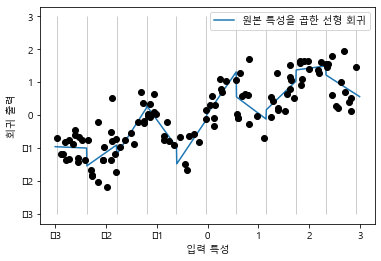

In [28]:
reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line*line_binned])
plt.plot(line, reg.predict(line_product), label='원본 특성을 곱한 선형 회귀')

plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)

plt.plot(X[:,0], y, 'o', c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc='best')

이 그림에서 볼 수 있듯이 이 모델에서는 각 구간에서 절편과 기울기가 모두 다르다. 구간 나누기는 연속형 특성을 확장하는 방법 중 하나이다. 원본 특성의 다항식을 추가하는 방법도 있다. 특성 x가 주어지면 x^2, x^3, x^4 등을 시도해볼 수 있다. 이 방식이 preprocessing 모듈의 PolynomialFeatures에 구현되어 있다.

In [29]:
from sklearn.preprocessing import PolynomialFeatures

# x**10까지 고차항을 추가한다.
# 기본값인 "include_bias=True"는 절편에 해당하는 1인 특성을 추가한다.
poly = PolynomialFeatures(degree=10, include_bias=False) # 10차항을 사용했으므로 10개의 특성이 만들어진다.
poly.fit(X)
X_poly = poly.transform(X)

print("X_poly.shape:",X_poly.shape)

X_poly.shape: (120, 10)


In [30]:
print("X 원소:\n", X[:5])
print("X_poly 원소:\n", X_poly[:5])

X 원소:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
X_poly 원소:
 [[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


In [31]:
print("항 이름:\n", poly.get_feature_names())

항 이름:
 ['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


X_poly의 첫 번째 열은 X와 같고 다른 열은 첫 번째 열의 거듭제곱이다. 그래서 어떤 값은 매우 크게 나오는 것을 볼 수 있다. 두 번째 행은 다른 값보다 월등하게 커 20,000이 넘기도 한다. 

다항식 특성을 선형 모델과 함께 사용하면 전형적인 **다항 회귀**모델이 된다.

C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


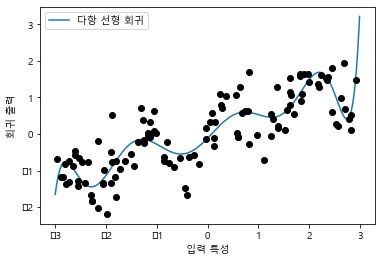

In [32]:
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='다항 선형 회귀')
plt.plot(X[:,0], y, 'o', c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc='best')

다항식 특성은 1차원 데이터셋에서도 매우 부드러운 곡선을 만든다. 그러나 고차우너 다항식은 데이터가 부족한 영역에서 너무 민감하게 동작한다.

비교를 위해 아무런 변환도 거치지 않은 원본 데이터에 커널 SVM 모델을 학습시켜보자.

C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


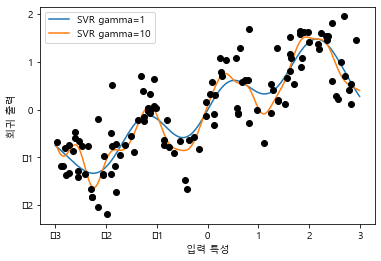

In [33]:
from sklearn.svm import SVR

for gamma in [1,10]:
    svr = SVR(gamma=gamma).fit(X,y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))
    
plt.plot(X[:,0], y, 'o', c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc='best')

더 복잡한 모델인 커널 SVM을 사용해 특성 데이터를 변환하지 않고 다항 회귀와 비슷한 복잡도를 가진 예측을 만들었다.

상호작용과 다항식을 위한 더 현실적인 애플리케이션으로 보스턴 주택 가격 데이터셋을 이용해보자. 이미 2장에서 이 데이터셋에 다항식 특성을 적용했었다. 이제 이 특성들이 어떻게 구성되었는지 살펴보고, 다항식 특성이 얼마나 도움이 되는지 보자. 먼저 데이터를 읽어 들이고 MinMaxScaler를 사용해 스케일을 0에서 1 사이로 조정한다.

In [34]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = tts(boston.data, boston.target, random_state=0)

# 데이터 스케일 조정
scaler = MinMaxScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.fit_transform(X_test)

In [35]:
poly = PolynomialFeatures(degree=2).fit(X_train_s)
X_train_p = poly.transform(X_train_s)
X_test_p = poly.transform(X_test_s)
print('X_train.shape:',X_train.shape)
print('X_train_poly.shape:', X_train_p.shape)

X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)


이 데이터는 원래 특성이 13개인데 105개의 교차 특성으로 확장되었다. 새로운 특성은 원래 특성의 제곱은 물론 가능한 두 특성의 조합을 모두 포함한다. 즉 degree=2로 하면 원본 특성에서 두 개를 뽑아 만들 수 있는 모든 곱을 얻을 수 있다. 어떤 원본 특성이 곱해져 새 특성이 만들어 졌는지 정확한 관계를 보려면 get_feature_names 메서드를 사용한다.

In [36]:
print("다항 특성 이름:\n",poly.get_feature_names())

다항 특성 이름:
 ['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


첫 번째 특성은 상수학, 즉 "1"이다. 다음 13개의 특성은 원본 특성이고, 그 다음은 첫 번째 특성의 제곱항과 첫 번째 특성과 다른 특성 간의 조합이다.

상호작용 특성이 있는 데이터와 없는 데이터에 대해 Ridge를 사용해 성능을 비교해보자.

In [37]:
from sklearn.linear_model import Ridge
rg = Ridge().fit(X_train_s, y_train)
print("상호작용 특성이 없을 때 점수: {:.3f}".format(rg.score(X_test_s, y_test)))
rg = Ridge().fit(X_train_p, y_train)
print("상호작용 특성이 있을 때 점수: {:.3f}".format(rg.score(X_test_p, y_test)))

상호작용 특성이 없을 때 점수: 0.577
상호작용 특성이 있을 때 점수: 0.741


확실히 상호작용과 다항식 특성이 Ridge의 성능을 크게 높였다. 그러나 랜덤 포에스트 같이 더 복잡한 모델을 사용하면 상호작용과 다항식 특성이 성능에 미치는 영향이 달라진다.

In [38]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_s, y_train)
print("상호작용 특성이 없을 때 점수: {:.3f}".format(rf.score(X_test_s, y_test)))
rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_p, y_train)
print("상호작용 특성이 있을 때 점수: {:.3f}".format(rf.score(X_test_p, y_test)))

상호작용 특성이 없을 때 점수: 0.786
상호작용 특성이 있을 때 점수: 0.761


특성을 추가하지 않아도 랜덤 포레스트는 Ridge의 성능과 맞먹는다. 오히려 상호작용과 가항식을 추가하면 성능이 조금 줄어든다.



# 4.6 일변량 비선형 변환

앞에서 제곱 항이나 세제곱 항을 추가하면 선형 회귀 모델에 도움이 됨을 보았다. 한편 log, exp, sin 같은 수학 함수를 적용하는 방법도 특성 변환에 유용하다. 트리 기반 모델은 특성의 순서에만 영향을 받지만 선형 모델과 신경망은 각 특성의 스케일과 분포에 밀접하게 연관되어 있다. 그리고 특성과 타깃값 사이에 비선형성이 있다면 특히 선형 회귀에서는 모델을 만들기가 어렵다. log와 exp 함수는 데이터의 스케일을 변경해 선형 모델과 신경망의 성능을 올리는 데 도움을 준다. 2장에서 컴퓨터 메모리 가격 데이터를 사용한 애플리케이션을 보았다. sin과 cos 함수는 이런 주기적인 패턴이 들어 있는 데이터를 다룰 때 편리하다.

대부분의 모델은 각 특성이 정규분포와 비슷할 때 최고의 성능을 낸다. 즉 특성의 히스토그램이 종 모양과 비슷할 때이다. log나 exp 같은 함수를 사용하는 것은 편법이지만, 이런 모양을 만드는 쉽고 효과적인 방법이다. 이런 변환이 도움되는 전형적인 경우는 정수 카운트 데이터를 다룰 때이다. 카운트 데이터라면 "사용자가 얼마나 자주 로그인하는가?" 같은 특성을 말한다. 카운트에는 음수가 없으며 특별한 통계 패턴을 따르는 경우가 많다. 여기서 실제 데이터의 속성과 비슷한 카운트 데이터를 만들어 사용해보자. 이 특성은 모두 정수이고 응답은 실수이다.

In [39]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000,3))
w = rnd.normal(size=3)

X = rnd.poisson(10*np.exp(X_org))
y = np.dot(X_org, w)
print(X[:10,0])

[ 56  81  25  20  27  18  12  21 109   7]


첫 번쨰 특성 맨 앞 10개를 살펴보면 모두 양의 정수이지만 특정한 패턴은 보이지 않는다. 하지만 각 값이 나타난 횟수를 세면 그 분포가 잘 드러난다.

In [40]:
print("특성 출현 횟수:\n", np.bincount(X[:,0]))

특성 출현 횟수:
 [28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


2가 68번으로 가장 많이 나타나며, 큰 값의 수는 빠르게 줄어든다. 그러나 85, 86처럼 아주 큰 값도 약간은 있다.

Text(0.5, 0, '값')

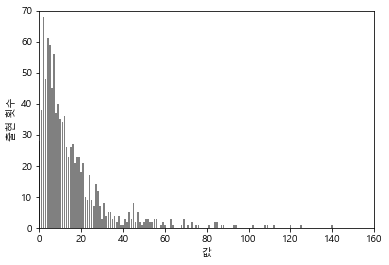

In [41]:
plt.xlim(0,160)
plt.ylim(0,70)
bins = np.bincount(X[:,0])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("출현 횟수")
plt.xlabel("값")

이런 종류의 분포는 실제로 자주 나타난다. 그러나 선형 모델은 이런 데이터를 잘 처리하지 못한다.  이 데이터에 리지 회귀를 적용시켜보자.

In [42]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = tts(X,y,random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("테스트 점수 : {:.3f}".format(score))

테스트 점수 : 0.622


비교족 낮은 R-square 점수가 나온 것으로 보아 Ridge는 X와 y의 관계를 제대로 모델링하지 못했다. 하지만 로그 스케일로 변환하면 도움이 된다. 데이터에 0이 있으면 log 함수를 적용할 수 없으므로 log(X+1)을 사용한다.

In [43]:
X_train_log = np.log(X_train+1)
X_test_log = np.log(X_test+1)

Text(0.5, 0, '값')

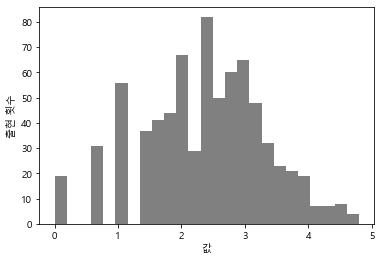

In [44]:
plt.hist(X_train_log[:,0], bins=25, color='grey')
plt.ylabel("출현 횟수")
plt.xlabel("값")

In [45]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("테스트 점수: {:.3f}".format(score))

테스트 점수: 0.875


데이터셋과 모델의 조합에 최적인 변환 방법을 찾기란 엄청 어려운 일이다. 이 예에서는 모든 특성이 같은 속성을 가지고 있다. 하지만 실제로 이런 경우는 드물며, 일부 특성만 변환하거나 특성마다 모두 다르게 변환하기도 한다. 앞서 언급한 대로 이런 변환은 트리 기반 모델에서는 불필요하지만 선형 모델에서는 필수이다. 가끔 회귀에서 타깃 변수 y를 변환하는 것이 좋을 때도 있다. 카운트를 예측하는 경우가 전형적인 예로 log(y+1)를 사용해 변환하면 도움이 된다.

이전 예에서 보았듯이 구간 분할, 다항식, 상호작용은 데이터가 주어진 상황에서 모델의 성능에 큰 영향을 줄 수 있다. 특별히 선형 모델이나 나이브 베이즈 모델 같은 덜 복잡한 모델일 경우이다. 반면에 트리 기반 모델은 스스로 중요한 상호작용을 찾아낼 수 있고 대부분의 경우 데이터를명시적으로 변환하지 않아도 된다. SVM, 최근접 이웃, 신경망 같은 모델은 이따금 구간 분할, 상호작용, 다항식으로 이득ㅇㄹ 볼 수 있지만, 선형 모델보다는 영향이 그렇게 뚜렷하지 않다.




# 4.7 특성 자동 선택

새로운 특성을 만드는 방법이 많으므로 데이터의 ㅏ원이 원본 특성의 수 이상으로 증가하기 쉽다. 그러나 특성이 추가되면 모델은 더 복잡해지고 과대적합될 가능성도 높아진다. 보통 새로운 특성을 추가할 때나 고차원 데이터셋을 사용할 때, 가장 유용한 특성만 선택하고 나머지는 무시해서 특성의 수를 줄이는 것이 좋다. 이렇게 하면 모델이 간단해지고 일반화 성능이 올라간다. 하지만 어떤 특성이 좋은지 어떻게 알 수 있을지 이를 위한 전략으로 **일변량 통계**, **모델 기반 선택**, **반복적 선택**이 있다. 이 세 방식을 모두 자세히 살펴보자. 이 방법들은 모두 지도 학습 방법이므로 최적값을 찾으려면 타깃값이 필요하다. 그리고 데이터를 훈련 세트와 테스트 세트로 나눈 다음 훈련 데이터만 특성 선택에 사용해야한다.

### 4.7.1 일변량 통계

일변량 통계에서는 개개의 특성과 타깃 사이에 중요한 통계적 관계가 있는지를 계산한다. 그런 다음 깊게 관련되어 있다고 판단되는 특성을 선택한다. 분류에서는 **분산분석**이라고도 한다. 이 방법의 핵심 요소는 **일변량**, 즉 각 특성이 독립적으로 평가된다는 점이다. 따라서 다른 특성과 깊게 연관된 특성은 선택되지 않을 것이다. 일변량 분석은 계산이 매우 빠르고 평가를 위해 모델을 만들 필요가 없다. 한편으로 이 방식은 특성을 선택한 후 적용하려는 모델에 상관없이 사용할 수 있다. 

scikit-learn에서 일변량 분석으로 특성을 선택하려면 분류에서는 f_classif(기본값)를, 회귀에서는 f_regression을 보통 선택하여 테스트하고, 계산한 p-value에 기초하여 특성을 제외하는 방식을 선택한다. 이런 방식들은 매우 높른 p-value를 가진 특성을 제외할 수 있도록 임계값을 조정하는 매개변수를 사용한다. 임계값을 계산하는 방법은 각각 다르며 가장 간단한 SelectKBest는 고정된 k개의 특성을 선택하고 SelectPercentile은 지정된 비율만큼 특성을 선택한다. 그럼 cancer 데이터셋에 분류를 위한 특성 선택을 적용해보자. 문제를 조금 복잡하게 하기 위해 의미 없는 노이즈 특성을 데이터에 추가해보자. 특성 선택이 이 의미 없는 특성을 식별해서 제거하는지 보자.

In [46]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile, f_classif

cancer = load_breast_cancer()

# 고정된 난수를 발생시킨다.
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
# 데이터에 노이즈 특성을 추가한다.
# 처음 30개는 원본 특성이고 다음 50개는 노이즈이다.
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = tts(X_w_noise, cancer.target, random_state=0, test_size=.5)
# f_classif(기본값)과 SelectPercentile을 사용하여 특성의 50%를 선택한다.
select = SelectPercentile(score_func = f_classif, percentile=50)
select.fit(X_train, y_train)
# 훈련 세트에 적용한다.
X_train_selected = select.transform(X_train)

print("X_train.shape:", X_train.shape)
print("X_train_selected.shape", X_train_selected.shape)

X_train.shape: (284, 80)
X_train_selected.shape (284, 40)


결과에서 볼 수 있듯이 특성 개수가 80개에서 40개로 줄었다. get_support 메서드는 선택된 특성을 불리언 값으로 표시해주어 어떤 특성이 선택되었는지 확인할 수 있다.

[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


([<matplotlib.axis.YTick at 0x158e985fd88>],
 <a list of 1 Text yticklabel objects>)

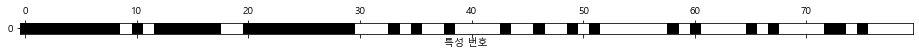

In [47]:
mask = select.get_support()
print(mask)
# True는 검은색, False는 흰색으로 마스킹한다.
plt.matshow(mask.reshape(1,-1), cmap='gray_r')
plt.xlabel("특성 번호")
plt.yticks([0])

마스킹된 그래프에서 볼 수 있듯이 선택된 특성은 대부분 원본 특성이고 노이즈 특성이 거의 모두 제거되었다. 그러나 원본 특성이 완벽하게 복원된 것은 아니다. 전체 특성을 이용했을 때와 선택된 특성만 사용했을 때 로지스틱 회귀의 성능을 비교해보자.

In [48]:
from sklearn.linear_model import LogisticRegression

# 테스트 데이터 변환
X_test_selected = select.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
print("전체 특성을 사용한 점수: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("선택된 일부 특성을 사용한 점수: {:.3f}".format(lr.score(X_test_selected, y_test)))

전체 특성을 사용한 점수: 0.930
선택된 일부 특성을 사용한 점수: 0.940


C:\Users\NT500R\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\NT500R\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


이 경우에서는 일부 원본 특성이 없더라도 노이즈 특성을 제거한 족의 성능이 더 높다. 이 예는 인위적으로 간단하게 만든 예제이고 실제 데이터에서의 결과는 보통 엇갈리는 경우도 많다. 하지만 너무 많은 특성 때문에 모델을 만들기가 현실적으로 어려울 때 일변량 분석을 사용하여 특성을 선택하면 큰 도움이 될 수 있다. 또는 많은 특성들이 확실히 도움이 안 된다고 생각될 때 사용할 수 있다.

### 4.7.2 모델 기반 특성 선택

모델 기반 특성 선택은 지도 학습 머신러닝 모델을 사용하여 특성의 중요도를 평가해서 가장 중요한 특성들만 선택한다. 특성 선택에 사용하는 지도 학습 모델은 최종적으로 사용할 지도 학습 모델과 같을 필요는 없다. 특성 선택을 위한 모델은 각 특성의 중요도를 측정하여 순서를 매길 수 있어야 한다. 결정 트리와 이를 기반으로 한 모델은 각 특성의 중요도가 담겨 있는 feature_importances_ 속성을 제공한다. 선형 모델 계수의 절댓값도 특성의 중요도를 재는 데 사용할 수 있다. 2장에서 L1 규제를 사용한 선형 모델은 일부 특성의 계수만 학습함을 보았다. 이를 그 모델 자체를 위해 특성이 선택된다고 생각할 수 있지만, 다른 모델의 특성 선택을 위해 전처리 단계로 사용할 수도 있다. 일변량 분석과는 반대로 모델 기반 특성 선택은 한 번에 모든 특성을 고려하므로 상호작용 부분을 반영할 수 있다. 모델 기반의 특성 선택은 SelectFromModel에 구현되어 있다.

In [49]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold='median')

SelectFromModel은 (지도 학습 모델로 계산된) 중요도가 지정한 임계치보다 큰 모든 특성을 선택한다. 일변량 분석으로 선택한 특성과 결과를 비교하기 위해 절반 가량의 특성이 선택될 수 있도록 중간값을 임계치로 사용한다. 트리 100개로 만든 랜덤 포레스트 분류기를 사용해 특성 중요도를 계산한다. 이는 매우 복잡한 모델이고 일변량 분석보다는 훨씬 강력한 방법이다.

In [50]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape:", X_train.shape)
print("X_train_l1.shape:", X_train_l1.shape)

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


Text(0.5, 0, '특성 번호')

C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


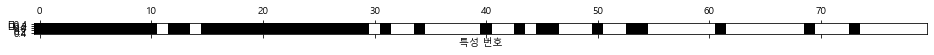

In [51]:
mask = select.get_support()
# True는 검은색, False는 흰색으로 마스킹한다.
plt.matshow(mask.reshape(1,-1), cmap='gray_r')
plt.xlabel("특성 번호")

이번에는 두 개를 제외한 모든 원본 특성이 선택되었다. 특성을 40개 선택하도록 지정했으므로 일부 노이즈 특성도 선택되었다. 성능이 얼마나 되는지 확인해보자.

In [52]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression().fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("테스트 점수: {:.3f}".format(score))

테스트 점수: 0.951


C:\Users\NT500R\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


특성 선택이 더 잘 되었으므로 성능도 조금 향상되었다.



### 4.7.3 반복적 특성 선택

일변량 분석에서는 모델을 사용하지 않았고, 모델 기반 선택에서는 하나의 모델을 사용해 특성을 선택했다. **반복적 특성 선택**에서는 특성의 수가 각기 다른 일련의 모델이 만들어진다. 기본적으로 두 가지 방법이 있다. 첫 번째는 특성을 하나도 선택하지 않은 상태로 시작해서 어떤 종료 조건에 도달할 때까지 하나씩 추가하는 방법이다. 두 번째는 모든 특성을 가지고 시작해서 어떤 종료 조건이 될 때까지 특성을 하나씩 제거해가는 방법이다. 일련의 모델이 만들어지기 때문에 이 방법은 앞서 소개한 방법들보다 계산 비용이 훨씬 많이 든다. **재귀적 특성 제거**(RFE)가 이런 방법의 하나이다. 이 방법은 모든 특성으로 시작해서 모델을 만들고 특성 중요도가 가장 낮은 특성을 제거한다. 그런 다음 제거한 특성을 빼고 나머지 특성 전체로 새로운 모델을 만든다. 이런 식으로 미리 정의한 특성 개수가 남을 때까지 계속한다. 이를 위해 모델 기반 선택에서처럼 특성 선택에 사용할 모델은 특성의 중요도를 결정하는 방법을 제공해야한다. 다음은 앞에서와 같은 랜덤 포레스트 모델을 사용해 얻은 결과이다.

Text(0.5, 0, '특성 번호')

C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


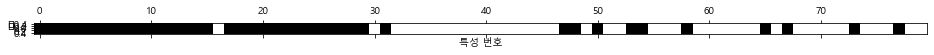

In [53]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=40)

select.fit(X_train, y_train)
# 선택된 특성을 표시한다.
mask = select.get_support()
plt.matshow(mask.reshape(1,-1), cmap='gray_r')
plt.xlabel("특성 번호")

일변량 분석이나 모델 기반 선택보다 특성 선택이 나아졌지만, 여전히 특성 한 개를 놓쳤다. 랜덤 포레스트 모델은 특성이 누락될 때마다 다시 학습하므로 40번이나 실행된다. 그래서 이 코드를 실행하면 모델 기반 선택보다 훨씬 오래 걸린다. RFE를 사용해서 특성을 선택했을 때 로지스틱 회귀의 정확도를 확인해보자.

In [54]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("테스트 점수: {:.3f}".format(score))

테스트 점수: 0.951


C:\Users\NT500R\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


또한 RFE에 사용된 모델을 이용해서도 예측을 할 수 있다. 이 경우 선택된 특성만 사용된다.

In [55]:
print("테스트 점수: {:.3f}".format(select.score(X_test, y_test)))

테스트 점수: 0.951


RFE 안에 있는 랜덤 포레스트의 성능이 이 모델에서 선택한 특성으로 만든 로지스틱 회귀의 성능과 같다. 다른 말로 하면, 특성 선택이 제대로 되면 선형 모델의 성능은 랜덤 포레스트와 견줄만하다.

머신러닝 알고리즘에 어떤 입력값을 넣을지 확신이 안 선다면 특성 자동 선택이 도움될 수 있다. 또 예측 속도를 높이거나 해석하기 더 쉬운 모델을 만드는 데 필요한 만큼 특성의 수를 줄이는 데도 효과적이다. 대부분 실전에서는 특성 선택이 큰 성능 향상을 끌어내진 못하는 것 같다. 그러나 특성 선택은 머신러닝 기술자에게 여전히 중요한 도구이다.



# 4.8 전문가 지식 활용

특성 공학은 특정한 애플리케이션을 위해 전문가의 지식을 사용할 수 있는 중요한 영역이다. 많은 경우 머신러닝의 목적은 전문가가 설계하는 규칙을 만들지 않기 위해서지만, 그렇다고 애플리케이션이나 그 분야의 전문 지식이 무시된다는 뜻은 아니다. 종종 분야 전문가는 초기 데이터에서 더 유용한 특성을 선택할 수 있도록 도움을 줄 수 있다.

여행사를 위해 항공료를 예측해야 한다고 생각해보자. 날짜, 항공사, 출발지, 도착지와 함께 가격을 기록할 수 있을 것이다. 이 데이터로부터 꽤 괜찮은 머신러닝 모델을 만들 수도 있다. 그러나 항공료에 포함된 중요한 요소 몇 가지는 학습될 수 없다. 예를 들어 휴가 성수기나 공휴일 근처에서는 항공료가 훨씬 비싸진다. (크리스마스 같은) 일부 공휴일은 날짜가 고정되어 있어서 날짜로부터 학습할 수 있지만, 부활절 처럼 음력 공류일도 있다. 또는 방학처럼 기관이 지정하기도 한다. 이런 이벤트들은 데이터가 날짜를 사용해서만 기록되어서는 학습될 수 없다. 그러나 공휴일과 방학 전후의 비행 스케줄이 기록된 특성을 추가하는 일은 어렵지 않다. 이런 식으로 그 작업에 내재된 사전 지식이 특성으로 추가 될 수 있다면 머신러닝 알고리즘에 도움이 된다. 특성이 추가된다고 머신러닝 알고리즘이 반드시 그 특성을 사용하는 것은 아니다. 예컨대 공휴일 정보가 항공료 예측에 도움이 안 된다고 판단되더라도 이 정보를 데이터에 추가하는 것이 문제가 되지는 않는다.

전문가 지식을 사용하는 전형적인 사례를 하나 보겠다. 바로 앤디 집 앞의 자전거가 대여 가능한지 예측하는 작업이다.

뉴욕에서 시티바이크는 회원 가입 시스템과 함께 자전거 대여소를 운영한다. 대여소는 도시 전체에 퍼져 있어서 여기저기 돌아다니기에 편리한 이동 수단이다. 자전거 대여 데이터는 익명으로 공개되어 있고 여러 방식으로 분석되어 왔다. 우리가 풀려는 문제는 특정 날짜와 시간에 앤디 집 앞에 있는 자전거를 사람들이 얼마나 대여할 것인지를 예측하는 것이다. 그래서 앤디가 빌릴 자전거가 남아 있는지 알려고 한다.

이 대여소에 대한 2015년 8월 데이터를 pandas의 DataFrame으로 읽어 들인다. 그런 다음 세 시간 간격으로 데이터를 다시 나누어 하루 동안의 주요 경향을 보자.

In [56]:
citibike = mglearn.datasets.load_citibike()

print("시티 바이크 데이터:\n", citibike.head())

시티 바이크 데이터:
 starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64


다음은 8월 한달 동안의 대여 횟수를 그래프로 나타낸 것이다.

C:\Users\NT500R\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, '대여 횟수')

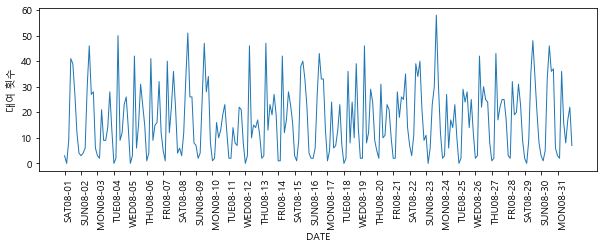

In [59]:
plt.figure(figsize=(10,3))
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(), freq='D')
week = ["SUN","MON","TUE","WED","THU","FRI","SAT"]
xticks_name = [week[int(w)]+d for w, d in zip(xticks.strftime("%w"), xticks.strftime("%m-%d"))]

plt.xticks(xticks, xticks_name, rotation=90, ha = "left")
plt.plot(citibike, linewidth=1)
plt.xlabel("DATE")
plt.ylabel("대여 횟수")

데이터를 보면 24시간 간격으로 낮과 밤을 확실히 구분할 수 있다. 주중과 주말의 패턴도 꽤 차이가 나는 것 같다. 이와 같은 시계열 데이터를 이용한 예측 작업은 과거 데이터에서 학습하여 미래를 예측하는 방식을 사용한다. 즉 데이터를 훈련 세트와 테스트 세트로 나눌 때 어떤 날짜까지의 모든 데이터를 훈련 세트로 하고, 그 날짜 이후의 모든 데이터를 테스트 세트로 사용한다. 이전의 대여 데이터를 모두 입력하고 내일 어떻게 될지를 예측하는 이런 방식은 시계열 예측에서 많이 사용한다. 여기서는 23일 치 184개 데이터 포인트를 훈련 세트로 사용하고, 남은 8일 치 64개 데이터 포인트를 테스트 세트로 사용하자.

이 작업에서 우리가 사용할 특성은 일정 횟수의 대여가 일어난 날짜와 시간뿐이다. 즉 입력 특성은 "2015-08-01 00:00:00"과 같은 날짜와 시간이고 출력은 연속된 세 시간 동안의 대여 횟수이다.

컴퓨터에 날짜를 저장하는 일반적인 방법은 "1970년 1월 1일 00:00:00"부터 경과한 시간을 초로 나타낸 POSIX 시간이다. 첫 번째 시도는 날짜와 시간을 하나의 숫자로 표현한 특성을 사용해보자.

In [60]:
# 타깃값 추출 (대여 횟수)
y = citibike.values
# POSIX 시간을 10**9로 나누어 변환
X = citibike.index.astype("int64").values.reshape(-1,1) // 10**9

먼저 데이터를 훈련 세트와 테스트 세트로 나눠 모델을 만들고, 결과 그래프를 그리는 함수를 만든다.

In [64]:
# 처음 184개 데이터 포인트를 훈련 세트로 사용하고 나머지는 테스트 세트로 사용한다.
n_train = 184

# 주어진 특성을 사용하여 평가하고 그래프를 만든다.
def eval_on_features(features, target, regressor):
    # 훈련 세트와 테스트 세트로 나눈다.
    X_train, X_test = features[:n_train], features[n_train:]
    # 타깃값도 나눈다.
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train,y_train)
    print("테스트 세트 R^2: {:.2f}".format(regressor.score(X_test, y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(10,3))
    
    plt.xticks(range(0,len(X),8), xticks_name, rotation=90, ha='left')
    
    plt.plot(range(n_train), y_train, label="훈련")
    plt.plot(range(n_train, len(y_test)+n_train), y_test, '-', label="테스트")
    plt.plot(range(n_train), y_pred_train, '--', label="훈련 예측")
    plt.plot(range(n_train, len(y_test)+n_train), y_pred, '--', label="테스트 예측")
    plt.legend(loc=(1.01,0))
    plt.xlabel("DATE")
    plt.ylabel("대여 횟수")

랜덤 포레스트는 데이터 전처리가 거의 필요하지 않아 맨 처음 시도해보기 좋은 모델이다. POSIX시간을 가진 특성 X와 랜덤 포레스트 회귀 모델을 eval_on_features 함수에 전달해보자.

테스트 세트 R^2: -0.04


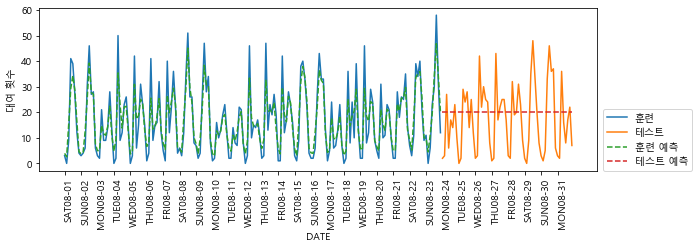

In [66]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
eval_on_features(X, y, regressor)

랜덤 포레스트 모델이 그렇듯이 훈련 세트의 예측은 매우 정확하다. 그런데 테스트 세트에 대해선 한 가지 값으로만 예측했다. R^2는 -0.04로, 거의 아무것도 학습되지 않았다는 것을 나타낸다. 무엇이 잘못된 것일까?

문제는 랜덤 포레스트와 특성 사이의 조합에 있다. 테스트 세트에 있는 POSIX 시간 특성의 값은 훈련 세트에 있는 특성 값의 범위 밖에 있다. 즉 테스트 세트에 있는 데이터 포인트는 훈련 세트에 있는 특성 값의 범위 밖에 있다. 즉 테스트 세트에 있는 데이터 포인트는 훈련 세트에 있는 모든 데이터보다 뒤의 시간이다. 트리 모델인 랜덤 포레스트는 훈련 세트에 있는 특성의 범위 밖으로 **외삽**(extrapolation)할 수 있는 능력이 없다. 결국 이 모델은 테스트 세트와 가장 가까이 있는 마지막 훈련 세트 데이터의 타깃값을 예측으로 사용하게 된다.

당연히 이보다 나은 방법이 있다. 여기에 전문가 지식이 필요하다. 훈련 데이터의 대여 데이터 그래프를 보면 시간과 요일이라는 두 요소가 중요한 것으로 보인다. 그럼 이 두 특성을 추가해보자. POSIX 시간으로는 아무것도 학습되지 않으므로 이 특성은 제외한다. 먼저 시간만 사용해보자.

테스트 세트 R^2: 0.60


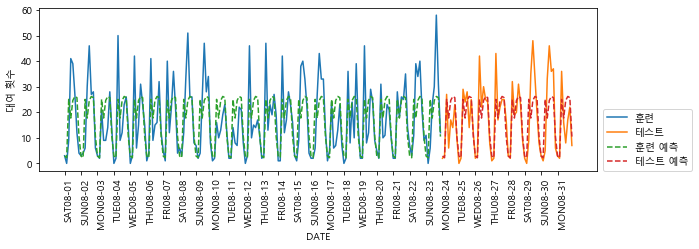

In [68]:
X_hour = citibike.index.hour.values.reshape(-1,1)
eval_on_features(X_hour, y, regressor)

R^2이 훨씬 나아졌지만 주간 패턴은 예측하지 못하는 것 같다. 이제 요일 정보도 추가해보자.

테스트 세트 R^2: 0.84


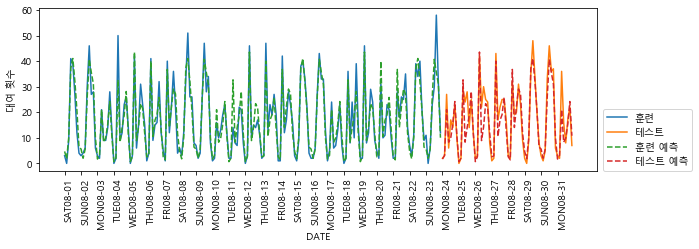

In [69]:
X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1,1), citibike.index.hour.values.reshape(-1,1)])
eval_on_features(X_hour_week, y, regressor)

이제 모델은 하루의 시간과 요일에 따른 주기적인 패턴을 따르고 있다. R^2은 0.84로 상당히 좋은 예측 성능을 내었다. 이 모델이 학습한 것은 8월 23일까지 요일별, 시간별 평균 대여 횟수이다. 이런 작업에 사실 랜덤 포레스트같이 복잡한 모델이 필요한 것은 아니므로 더 간단한 모델인 LinearRegression을 적용해보자.

테스트 세트 R^2: 0.13


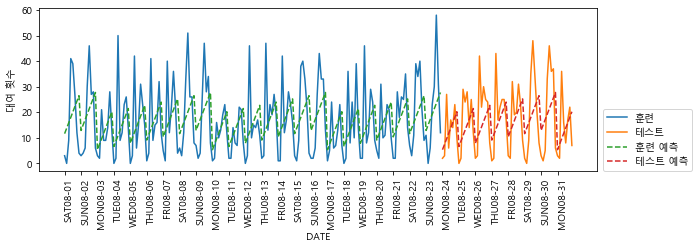

In [70]:
from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week, y, LinearRegression())

LinearRegression 성능은 훨씬 나쁘고 주기적인 패턴도 이상하다. 그 이유는 요일과 시간이 정수로 인코딩되어 있어서 연속형 변수로 해석되기 때문이다. 선형 모델은 시간을 선형 함수로만 학습할 수 있어서, 하루에서 시간이 흐를수록 대여 수가 늘어나게 학습 되었다. 하지만 실제 패턴은 이보다 복잡하다. 이 패턴을 잡아내기 위해 OneHotEncoder를 사용하여 정수형을 범주형 변수로 해석하도록 해보자.

In [71]:
enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()

C:\Users\NT500R\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


테스트 세트 R^2: 0.62


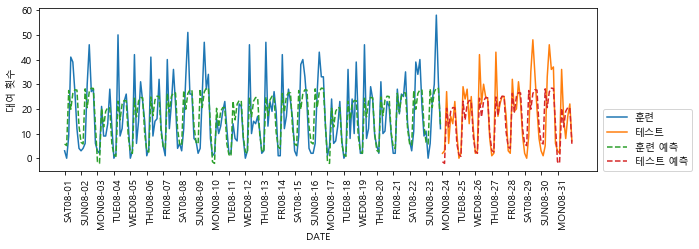

In [72]:
eval_on_features(X_hour_week_onehot, y, Ridge())

연속형 특성일 때보다 훨씬 좋아졌다. 이 선형 모델은 요일마다 하나의 계수를 학습하고, 시간마다도 하나의 계수를 학습한다. 이 말은 시간 패턴이 모든 날에 걸쳐 공유된다는 뜻이다. 상호작용 특성을 사용하면 시간과 요일의 조합별 계수를 학습할 수 있다.

테스트 세트 R^2: 0.85


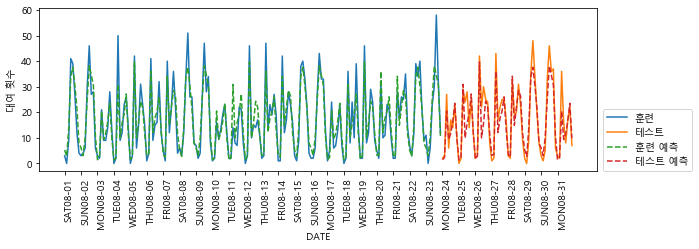

In [74]:
poly_transformer = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)

이런 특성 변환을 통해 모델의 성능이 랜덤 포레스트와 거의 비슷해졌다. 이 모델의 가장 큰 장점은 무엇이 학습되었는지가 명확하다는 것이다. 바로 각 날짜와 시간에 대해 하나의 계수를 학습했다. 랜덤 포레스트와는 달리 이 모델이 학습한 계수를 그래프로 나타낼 수 있다.

먼저 시간과 요일 특성의 이름을 짓는다.

In [75]:
hour = ["%02d:00" % i for i in range(0,24,3)]
day = ["MON", "TUE", "WED", "THU", "FRI", "SAT", "SUN"]
features = day + hour

그런 다음 get_feature_names 메서드를 사용해 PolynomialFeatures로 추출한 모든 상호작용 특성에 이름을 달아준다. 그리고 계수가 0이 아닌 특성만 선택한다.

In [76]:
features_poly = poly_transformer.get_feature_names(features)
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]

Text(0, 0.5, '계수 크기')

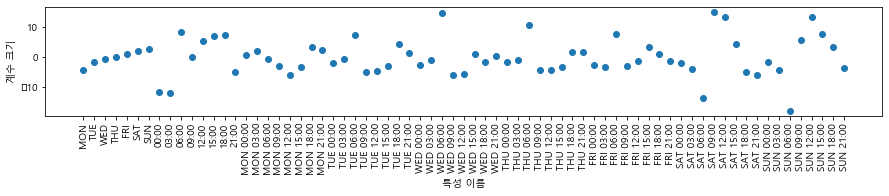

In [78]:
plt.figure(figsize=(15,2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel("특성 이름")
plt.ylabel("계수 크기")

# 4.9 요약 및 정리

이번 장에서 여러 종류의 데이터 타입(특히 범주형 변수)을 다루는 법을 배웠다. 예를 들어 원-핫-인코딩 범주형 변수처럼 머신러닝 알고리즘에 적합한 방식으로 데이터를 표현하는 것이 아주 중요함을 설명했다. 그리고 새로운 특성을 만드는 것과 데이터에서 특성을 유도하기 위해 전문가의 지식을 활용하는 것에 대해 다뤘다. 특히 선형 모델은 구간 분할이나 다항식과 상호작용 특성을 새로 추가해 큰 이득을 볼 수 있다. 반면에 랜덤 포레스트나 SVM 같은 비선형 모델은 특성을 늘리지 않고서도 복잡한 문제를 학습할 수 있다. 실제로는 어떤 특성을 사용하느냐가 가장 중요하다. 

이제 적절한 방식으로 데이터를 표현하는 방법과 어떤 작업에 어떤 알고리즘을 사용할지 이해했을 것이다. 다음 장에서는 머신러닝 모델의 성능을 평가하고, 올바른 매개변수를 선택하는 방법을 다루도록 하겠다.